In [1]:
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np

In [2]:
rds_connection_string = "postgres:postgres@localhost:5432/SuperUberDuberProject"
engine = create_engine(f'postgresql://{rds_connection_string}')

In [3]:
engine.table_names()

['store_directory', 'happiness']

In [4]:
happiness_df = pd.read_sql_query('select * from happiness', con=engine)
happiness_df.head()

,country,happiness_rank,gdp_per_capita,freedom
0,Norway,1,1.616463,0.635423
1,Denmark,2,1.482383,0.626007
2,Iceland,3,1.480633,0.627163
3,Switzerland,4,1.564980,0.620071
4,Finland,5,1.443572,0.617951


In [5]:
len(happiness_df)

155

In [6]:
store_directory_df = pd.read_sql_query('select * from store_directory', con=engine)
store_directory_df.head()

,amount_of_stores,Country
0,1,Andorra
1,144,United Arab Emirates
2,108,Argentina
3,18,Austria
4,22,Australia


In [7]:
len(store_directory_df)

72

In [8]:
merged_df = store_directory_df.merge(happiness_df, left_on='Country', right_on='country')
merged_df.head()

,amount_of_stores,Country,country,happiness_rank,gdp_per_capita,freedom
0,144,United Arab Emirates,United Arab Emirates,21,1.626343,0.608345
1,108,Argentina,Argentina,24,1.185295,0.494519
2,18,Austria,Austria,13,1.487097,0.567766
3,22,Australia,Australia,10,1.484415,0.601607
4,4,Azerbaijan,Azerbaijan,85,1.153602,0.398156


In [9]:
len(merged_df)

60

In [10]:
x_axis = merged_df['happiness_rank']
y_axis = merged_df['amount_of_stores']

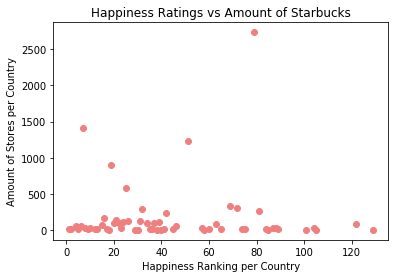

In [11]:
plt.scatter(x_axis, y_axis, marker="o", color="lightcoral")
plt.title("Happiness Ratings vs Amount of Starbucks")
plt.ylabel("Amount of Stores per Country")
plt.xlabel("Happiness Ranking per Country")
plt.show()

In [12]:
len_country = np.arange(0, len(merged_df['country']))
country = (merged_df['country'])

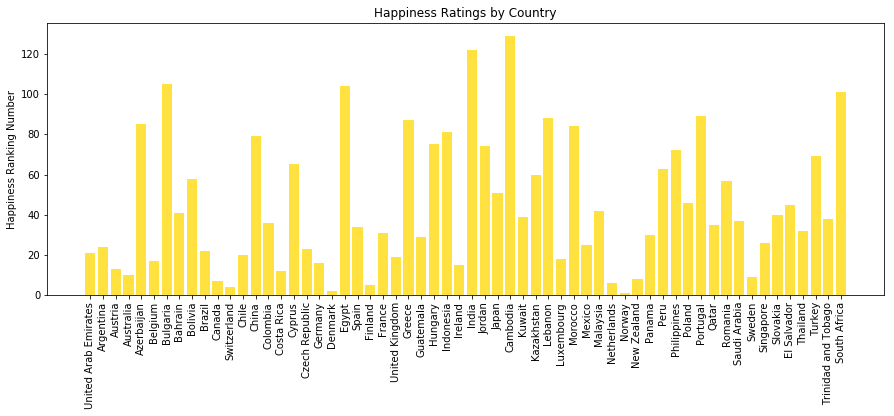

In [13]:
plt.figure(figsize=(15,5))
plt.bar(len_country, merged_df['happiness_rank'], facecolor="gold", alpha=0.75, align="center")
plt.xticks(len_country, country, rotation=90)
plt.tick_params(axis='x', which='major', labelsize=10)
plt.title("Happiness Ratings by Country")
plt.ylabel("Happiness Ranking Number")
plt.show()

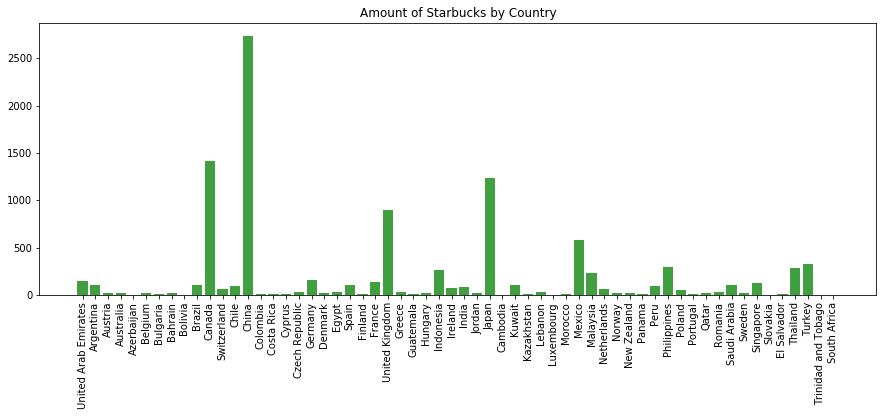

In [14]:
plt.figure(figsize=(15,5))
plt.bar(len_country, merged_df['amount_of_stores'], facecolor="green", alpha=0.75, align="center")
plt.xticks(len_country, country, rotation=90)
plt.tick_params(axis='x', which='major', labelsize=10)
plt.title("Amount of Starbucks by Country")
plt.show()